In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab_Notebooks/AdvancedDeepLearningCourse/Session02/LeNet 5 Mnist")

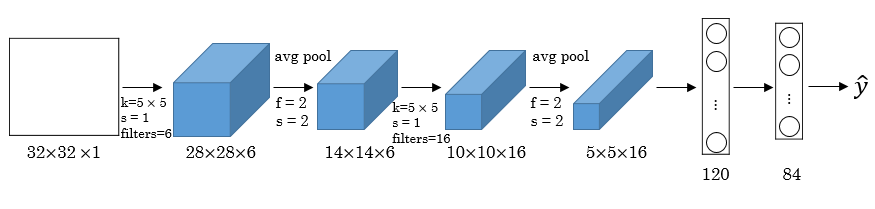

In [0]:
from IPython.display import Image
Image('LeNet-5.PNG')

In [0]:
import numpy as np

from keras.datasets import mnist
from keras.models import Model 
from keras.layers import Dense, Conv2D, AveragePooling2D, Input, Activation, Flatten
from keras.utils import to_categorical, plot_model

In [0]:
# data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = x_train.shape[1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((-1, image_size, image_size, 1))
x_test = x_test.reshape((-1, image_size, image_size, 1))

n_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

In [0]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)),'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)),'constant')

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (60000, 32, 32, 1)
x_test  (10000, 32, 32, 1)


In [0]:
# hyper paramters
kernel_size = 5
filters = [6, 16]
fc_units = [120, 84]

batch_size = 128
n_epochs = 10

In [0]:
inputs = Input(shape=(32, 32, 1), name='inputs')
x = inputs 
x = Conv2D(filters=filters[0],
           kernel_size=kernel_size,
           activation='relu',
           name=f'layer_1_conv_1_f_{filters[0]}_k_{kernel_size}_a_relu')(x)
print("conv_1:", x.shape )

x = AveragePooling2D(pool_size=2,
                     strides=2,
                     name='layer_1_avg_pool_1_p_2_s_2')(x)
print("pool_1:", x.shape )

x = Conv2D(filters=filters[1],
           kernel_size=kernel_size,
           activation='relu',
           name=f'layer_2_conv_2_f_{filters[1]}_k_{kernel_size}_a_relu')(x)
x = AveragePooling2D(pool_size=2,
                     strides=2,
                     name='layer_2_avg_pool_2_p_2_s_2')(x)
print("pool_2:", x.shape )
x = Flatten()(x)
print("flatten:", x.shape )

x = Dense(units=fc_units[0], activation='relu', name= f'layer_3_fc_1_u_{fc_units[0]}_a_relu')(x)
x = Dense(units=fc_units[1], activation='relu', name= f'layer_4_fc_2_u_{fc_units[1]}_a_relu')(x)
x = Dense(units=n_labels, name= f'layer_5_output_u_{n_labels}')(x)
outputs = Activation('softmax',name='layer_5_softmax')(x)

model = Model(inputs=inputs, outputs=outputs, name='LeNet-5')
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()
plot_model(model=model, to_file='LeNet-5_mnist.png', show_shapes=True)

W0821 09:50:23.339010 139770290116480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:50:23.395771 139770290116480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 09:50:23.431718 139770290116480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0821 09:50:23.454205 139770290116480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 09:50:23.512283 139770290116480 deprecation_wrapp

conv_1: (?, 28, 28, 6)
pool_1: (?, 14, 14, 6)
pool_2: (?, 5, 5, 16)
flatten: (?, ?)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 32, 32, 1)         0         
_________________________________________________________________
layer_1_conv_1_f_6_k_5_a_rel (None, 28, 28, 6)         156       
_________________________________________________________________
layer_1_avg_pool_1_p_2_s_2 ( (None, 14, 14, 6)         0         
_________________________________________________________________
layer_2_conv_2_f_16_k_5_a_re (None, 10, 10, 16)        2416      
_________________________________________________________________
layer_2_avg_pool_2_p_2_s_2 ( (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________________________________________________________

In [0]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=n_epochs,
          batch_size=batch_size)

W0821 09:50:46.618989 139770290116480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 09:50:46.700570 139770290116480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.3569 - acc: 0.8939 - val_loss: 0.1093 - val_acc: 0.9666
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0991 - acc: 0.9704 - val_loss: 0.0692 - val_acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0703 - acc: 0.9785 - val_loss: 0.0461 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0557 - acc: 0.9827 - val_loss: 0.0457 - val_acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0469 - acc: 0.9850 - val_loss: 0.0483 - val_acc: 0.9842
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0397 - acc: 0.9877 - val_loss: 0.0355 - val_acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0360 - acc: 0.9884 - val_loss: 0.0421 - val_a

*:)*